In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import os 
import cv2 #to reduce image operations
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator 

In [2]:
imageHeight = 1024
imageWidth = 1024
# Path of the images stored directory
mainDirectory = "../Cranium-Cryptics/Tumour Classfication Data/"

# Types of the tumours and its directory name
tumourCategories = ["glioma", "meningioma", "pituitary", "notumor"] 

gliomaData = []
meningiomaData = []
pituitaryData = []
noTumor = []
for classess in tumourCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       # Rsizing the images to 512 * 512
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "glioma":
         gliomaData.append(image_array)
       elif classess == "meningioma":
         meningiomaData.append(image_array)
       elif classess == "pituitary":
         pituitaryData.append(image_array)
       else:
        noTumor.append(image_array)

# Converting the lists into numpy arrays for tumour types
gliomaData = np.array(gliomaData)
meningiomaData = np.array(meningiomaData)
pituitaryData = np.array(pituitaryData)
noTumor = np.array(noTumor)

In [3]:
# shape of glioma image set
gliomaData.shape  

(1621, 1024, 1024, 3)

In [4]:
# shape of meningioma image set
meningiomaData.shape

(1645, 1024, 1024, 3)

In [5]:
# shape of pituitary image set
pituitaryData.shape

(1757, 1024, 1024, 3)

In [6]:
# shape of no tumour image set
noTumor.shape

(2000, 1024, 1024, 3)

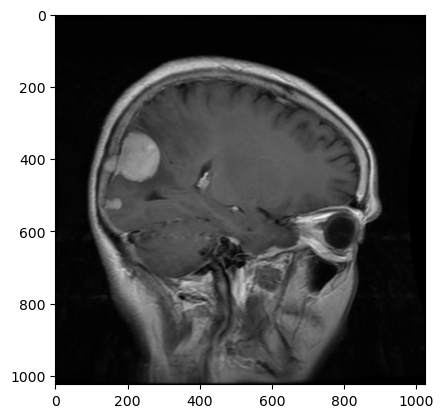

In [7]:
plt.imshow(meningiomaData[1400])  

In [10]:
generatedData = ImageDataGenerator(
    rotation_range = 20, #rotate image to 45 degrees
    zoom_range = 0.15, # zoom image from 0.15 in and out
    horizontal_flip= True, # flip image horizontally
    fill_mode= "constant", # gap filler after augmentation with the nearest pixel value
    shear_range= 0.15,
    cval=0 # fills black around the image
) 

def augementData(image_dataset_type, path, prefix):
    for x in image_dataset_type:
        x = x.reshape(1, 1024, 1024, 3)
        count = 0
        for batches in generatedData.flow(x, 
                                      batch_size=16, 
                                      save_to_dir=path,
                                      save_prefix=prefix,
                                      save_format="jpg"):
            count += 1
            if count > 4:
                break

In [11]:
augementData(gliomaData, "../Cranium-Cryptics/Tumour Classfication Data/AugmentedGlioma/", "aug_glioma")
augementData(meningiomaData, "../Cranium-Cryptics/Tumour Classfication Data/AugmentedMeningioma/", "aug_meningioma")
augementData(pituitaryData, "../Cranium-Cryptics/Tumour Classfication Data/AugmentedPituitary/", "aug_pituitary")
augementData(noTumor, "../Cranium-Cryptics/Tumour Classfication Data/AugmentedNoTumor/", "aug_no_tumor")